In [17]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the datasets
df_body = pd.read_csv("soc-redditHyperlinks-body.tsv", sep="\t")
df_title = pd.read_csv("soc-redditHyperlinks-title.tsv", sep="\t")

# Display first few rows
df_body.head(), df_title.head()

(  SOURCE_SUBREDDIT TARGET_SUBREDDIT  POST_ID            TIMESTAMP  \
 0  leagueoflegends  teamredditteams  1u4nrps  2013-12-31 16:39:58   
 1       theredlion           soccer   1u4qkd  2013-12-31 18:18:37   
 2     inlandempire           bikela  1u4qlzs  2014-01-01 14:54:35   
 3              nfl              cfb  1u4sjvs  2013-12-31 17:37:55   
 4       playmygame          gamedev  1u4w5ss  2014-01-01 02:51:13   
 
    LINK_SENTIMENT                                         PROPERTIES  
 0               1  345.0,298.0,0.75652173913,0.0173913043478,0.08...  
 1              -1  101.0,98.0,0.742574257426,0.019801980198,0.049...  
 2               1  85.0,85.0,0.752941176471,0.0235294117647,0.082...  
 3               1  1124.0,949.0,0.772241992883,0.0017793594306,0....  
 4               1  715.0,622.0,0.777622377622,0.00699300699301,0....  ,
     SOURCE_SUBREDDIT TARGET_SUBREDDIT  POST_ID            TIMESTAMP  \
 0         rddtgaming         rddtrust  1u4pzzs  2013-12-31 16:39:18   
 

In [18]:
# Check dataset info
df_body.info()
df_title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286561 entries, 0 to 286560
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   SOURCE_SUBREDDIT  286561 non-null  object
 1   TARGET_SUBREDDIT  286561 non-null  object
 2   POST_ID           286561 non-null  object
 3   TIMESTAMP         286561 non-null  object
 4   LINK_SENTIMENT    286561 non-null  int64 
 5   PROPERTIES        286561 non-null  object
dtypes: int64(1), object(5)
memory usage: 13.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571927 entries, 0 to 571926
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   SOURCE_SUBREDDIT  571927 non-null  object
 1   TARGET_SUBREDDIT  571927 non-null  object
 2   POST_ID           571927 non-null  object
 3   TIMESTAMP         571927 non-null  object
 4   LINK_SENTIMENT    571927 non-null  int64 
 5   PROPERTIES        5

In [19]:
# Count missing values in each column
print(df_body.isnull().sum())
print(df_title.isnull().sum()) 

SOURCE_SUBREDDIT    0
TARGET_SUBREDDIT    0
POST_ID             0
TIMESTAMP           0
LINK_SENTIMENT      0
PROPERTIES          0
dtype: int64
SOURCE_SUBREDDIT    0
TARGET_SUBREDDIT    0
POST_ID             0
TIMESTAMP           0
LINK_SENTIMENT      0
PROPERTIES          0
dtype: int64


In [20]:
# Checking unique columns in each dataset
print("Body Dataset Columns:", df_body.columns)
print("Title Dataset Columns:", df_title.columns)

Body Dataset Columns: Index(['SOURCE_SUBREDDIT', 'TARGET_SUBREDDIT', 'POST_ID', 'TIMESTAMP',
       'LINK_SENTIMENT', 'PROPERTIES'],
      dtype='object')
Title Dataset Columns: Index(['SOURCE_SUBREDDIT', 'TARGET_SUBREDDIT', 'POST_ID', 'TIMESTAMP',
       'LINK_SENTIMENT', 'PROPERTIES'],
      dtype='object')


In [22]:
# Convert timestamp column from object to datetime format
df_body["TIMESTAMP"] = pd.to_datetime(df_body["TIMESTAMP"])
df_title["TIMESTAMP"] = pd.to_datetime(df_title["TIMESTAMP"])

print(df_body["TIMESTAMP"].dtype)
print(df_body["TIMESTAMP"].head())


datetime64[ns]
0   2013-12-31 16:39:58
1   2013-12-31 18:18:37
2   2014-01-01 14:54:35
3   2013-12-31 17:37:55
4   2014-01-01 02:51:13
Name: TIMESTAMP, dtype: datetime64[ns]


In [23]:
#Add a New Column to Identify Data Source
df_body["DATASET"] = "body"
df_title["DATASET"] = "title"

In [24]:
# Merge the two datasets
df_combined = pd.concat([df_body, df_title], ignore_index=True)


In [25]:
#Verifying the Merge
print(df_combined.info())  
print(df_combined.head())  
print(df_combined["DATASET"].value_counts())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858488 entries, 0 to 858487
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   SOURCE_SUBREDDIT  858488 non-null  object        
 1   TARGET_SUBREDDIT  858488 non-null  object        
 2   POST_ID           858488 non-null  object        
 3   TIMESTAMP         858488 non-null  datetime64[ns]
 4   LINK_SENTIMENT    858488 non-null  int64         
 5   PROPERTIES        858488 non-null  object        
 6   DATASET           858488 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 45.8+ MB
None
  SOURCE_SUBREDDIT TARGET_SUBREDDIT  POST_ID           TIMESTAMP  \
0  leagueoflegends  teamredditteams  1u4nrps 2013-12-31 16:39:58   
1       theredlion           soccer   1u4qkd 2013-12-31 18:18:37   
2     inlandempire           bikela  1u4qlzs 2014-01-01 14:54:35   
3              nfl              cfb  1u4sjvs 201

In [26]:
# Increase sampling to get a more interconnected network
df_sampled = df_combined.sample(n=1000, random_state=42)

In [ ]:
#Creating an undirected graph
graph = nx.Graph()

#Adding edges
for index, row in df_sampled.iterrows():
graph.add_edge(row["SOURCE_SUBREDDIT"], row["TARGET_SUBREDDIT"], weight=row["LINK_SENTIMENT"])

print(f"Graph has {graph.number_of_nodes()} nodes and {graph.number_of_edges()} edges.")

Graph has 1249 nodes and 992 edges.


In [30]:
# Extract the largest connected component
largest_component = max(nx.connected_components(graph), key=len)
graph = graph.subgraph(largest_component).copy()

In [35]:
#Removing weakly connected nodes
graph = nx.k_core(graph, k=2) 

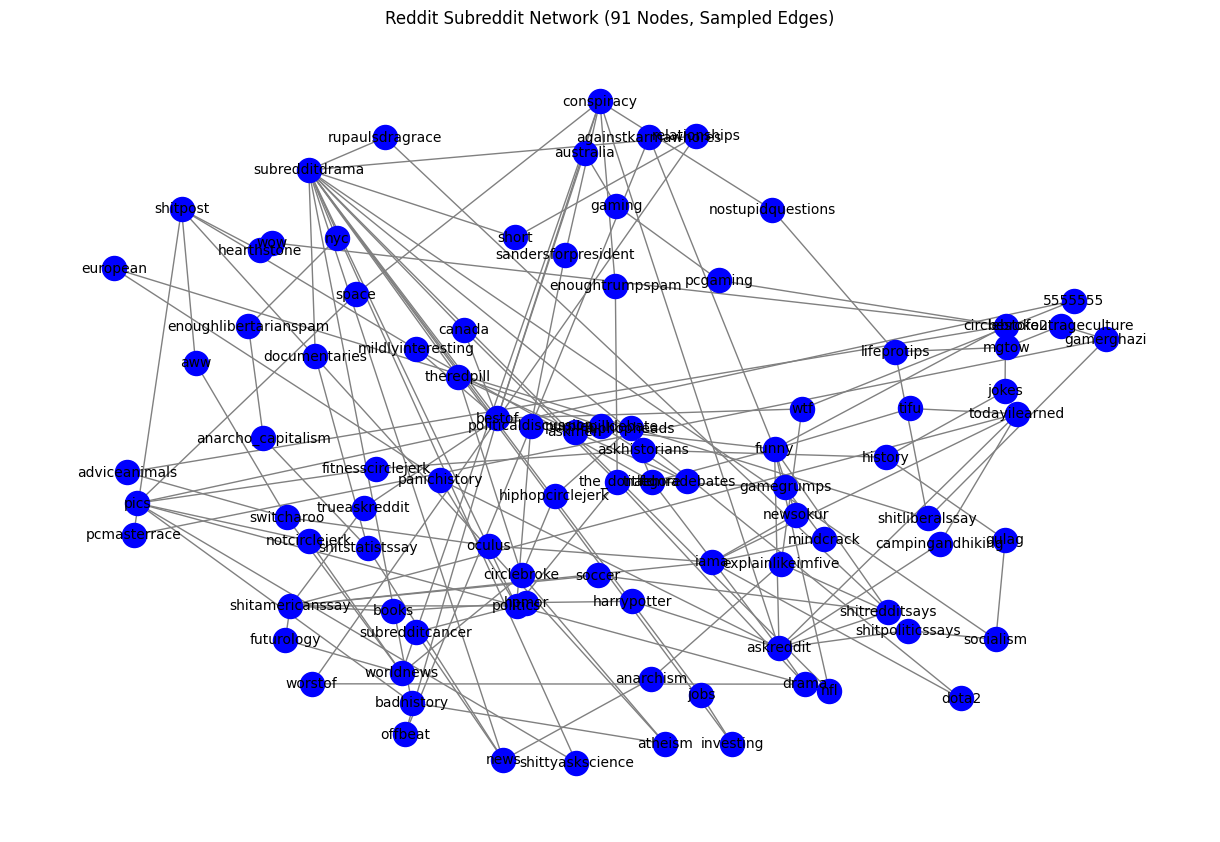

In [ ]:
#Plotting a graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(graph, k=0.3)
nx.draw(graph, pos, node_size=300, font_size=10, edge_color="gray", with_labels=True, node_color="blue")

plt.title(f"Reddit Subreddit Network ({graph.number_of_nodes()} Nodes, Sampled Edges)")
plt.show()

Number of isolated subreddits: 11317
Sample isolated subreddits: ['violins', 'unremovable', 'queensoflondon', 'shopping', 'botcraft', 'opengovcan', 'imaginarygadgets', 'ignorant9gag', 'polyamoryr4r', 'vhscoverart']


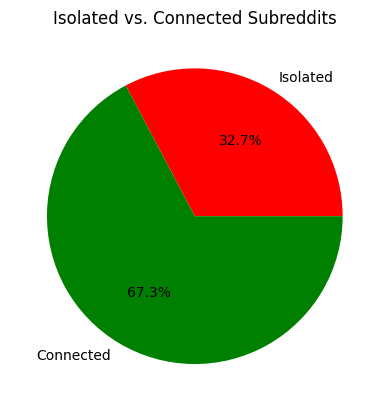

In [ ]:
# Research Questions 1
# Are there subreddits that only receive links but never link to others?


# Find isolated subreddits
isolated_subreddits = set(df_combined["TARGET_SUBREDDIT"]) - set(df_combined["SOURCE_SUBREDDIT"])
num_isolated = len(isolated_subreddits)
num_non_isolated = df_combined["TARGET_SUBREDDIT"].nunique() - num_isolated

print(f"Number of isolated subreddits: {num_isolated}")
print("Sample isolated subreddits:", list(isolated_subreddits)[:10])

# Plot pie chart
plt.pie([num_isolated, num_non_isolated], labels=["Isolated", "Connected"], autopct="%1.1f%%", colors=["red", "green"])
plt.title("Isolated vs. Connected Subreddits")
plt.show()


In [ ]:
# Research Questions 2
# What is the average shortest path length between subreddits in the largest connected component?
avg_path_length = nx.average_shortest_path_length(graph)
print(f"Average path length between subreddits in the largest component: {avg_path_length:.2f}")


Average path length between subreddits in the largest component: 3.80


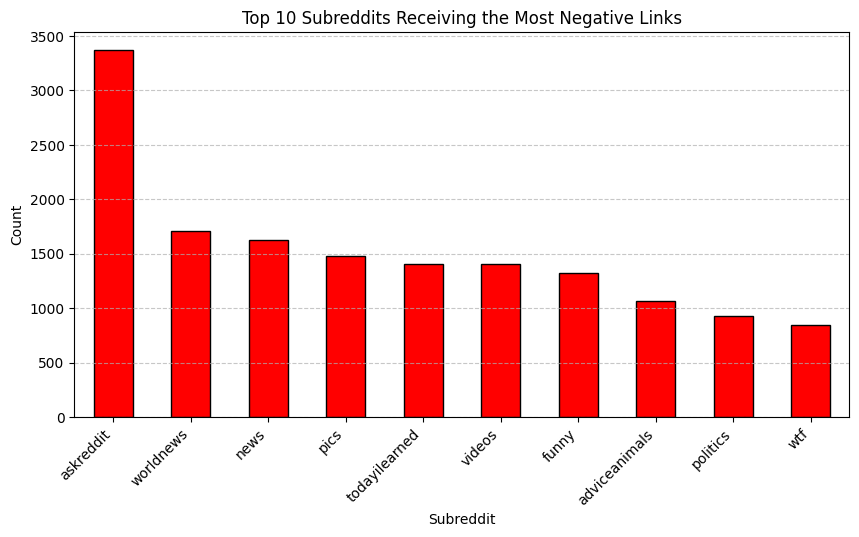

In [ ]:
# Research Questions 3
# Which subreddits receive the highest number of negative sentiment links?

# Count negative links per subreddit and get the top 10
top_negative_subreddits = df_combined[df_combined["LINK_SENTIMENT"] < 0]["TARGET_SUBREDDIT"].value_counts().head(10)

# Ploting a bar chart
top_negative_subreddits.plot(kind="bar", color="red", figsize=(10, 5), edgecolor="black")

plt.title("Top 10 Subreddits Receiving the Most Negative Links")
plt.xlabel("Subreddit")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

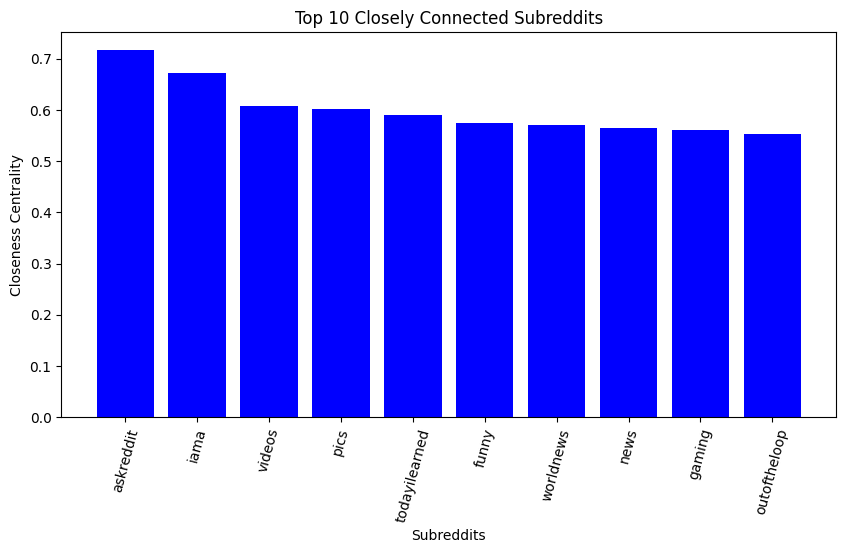

In [ ]:
# Research Questions 4
# What are the top 10 subreddits with the highest closeness centrality in the subreddit network?

# Take a subgraph of the top 1000 most connected nodes
largest_nodes = sorted(G.degree(), key=lambda x: x[1], reverse=True)[:1000]
selected_nodes = [node for node, _ in largest_nodes]
G_small = G.subgraph(selected_nodes)

# Compute closeness centrality for this subgraph
closeness = nx.closeness_centrality(G_small)
top_closeness = sorted(closeness.items(), key=lambda x: x[1], reverse=True)[:10]

subreddits, scores = zip(*top_closeness)

# Plot bar chart
plt.figure(figsize=(10, 5))
plt.bar(subreddits, scores, color='blue')
plt.xticks(rotation=75)
plt.xlabel("Subreddits")
plt.ylabel("Closeness Centrality")
plt.title("Top 10 Closely Connected Subreddits")
plt.show()


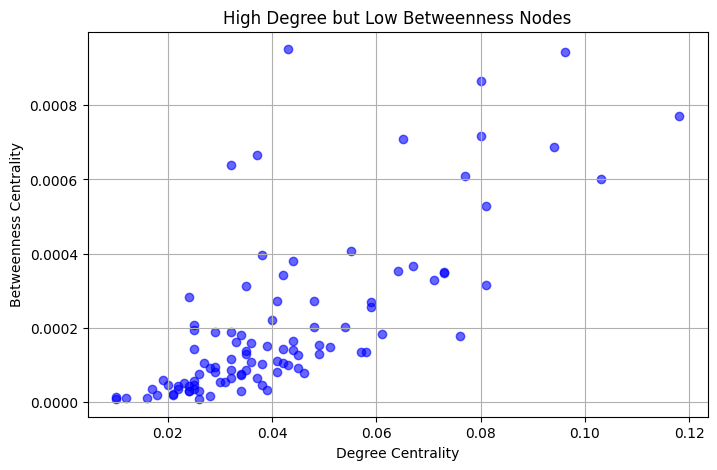

Top Subreddits that are influential but not bridges: ['college', 'ottawa', 'spotify', 'tagpro', 'darksouls3', 'thathappened', 'tipofmypenis', 'programmerhumor', 'osugame', 'python']


In [ ]:
# Research Questions 5
# Which subreddits have high degree centrality but low betweenness centrality?

# Compute degree centrality
largest_nodes = sorted(G.degree(), key=lambda x: x[1], reverse=True)[:1000]
selected_nodes = [node for node, _ in largest_nodes]
G_small = G.subgraph(selected_nodes)

# Compute centrality only on the smaller graph
degree_centrality = nx.degree_centrality(G_small)
betweenness = nx.betweenness_centrality(G_small, k=500) 

# Find nodes with high degree but low betweenness
high_degree_low_betweenness = [node for node in degree_centrality  if degree_centrality[node] > 0.01 and betweenness[node] < 0.001]

# Limit to top 100 
high_degree_low_betweenness = high_degree_low_betweenness[:100]

# Plot visualization
plt.figure(figsize=(8, 5))
plt.scatter([degree_centrality[n] for n in high_degree_low_betweenness],
             [betweenness[n] for n in high_degree_low_betweenness],color='blue', alpha=0.6)
plt.xlabel("Degree Centrality")
plt.ylabel("Betweenness Centrality")
plt.title("High Degree but Low Betweenness Nodes")
plt.grid(True)
plt.show()

print("Top Subreddits that are influential but not bridges:", high_degree_low_betweenness[:10])


Total Unique Subreddits: 35776


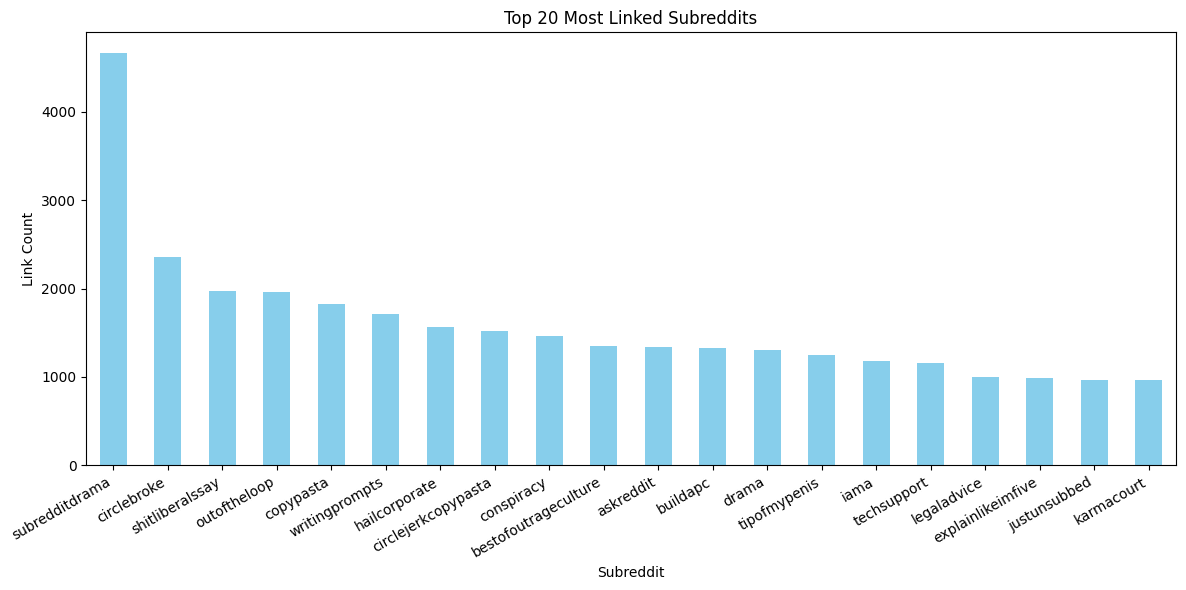

In [ ]:

# Research Questions 6
# How many unique subreddits exist in the dataset, and which ones are linked the most?

#  Get unique subreddits
unique_subreddits = set(df['source_subreddit']).union(set(df['target_subreddit']))
print(f"Total Unique Subreddits: {len(unique_subreddits)}")

# Plot distribution of top 20 most linked subreddits
plt.figure(figsize=(12, 6)) 
ax = df['source_subreddit'].value_counts().head(20).plot(kind='bar', color='skyblue')

plt.title("Top 20 Most Linked Subreddits")
plt.xlabel("Subreddit")
plt.ylabel("Link Count")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()
